# Datasets Analysis for Modeling Semantic Plausibility: pep-3k

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import nltk
from nltk import word_tokenize, pos_tag,FreqDist
import seaborn as sns
import spacy
from gensim.models import KeyedVectors

# download punkt and averaged_perceptron_tagger
# nltk.download('punkt')
# nltk.download('averaged_perceptron_tagger')

## Load and Combine Files

In [81]:
def combine_datasets(file_paths):
    
    dataframes = []
    
    for file_path in file_paths:
        data = pd.read_csv(file_path)
        dataframes.append(data)
    
    combined_data = pd.concat(dataframes, ignore_index=True)
    
    return combined_data

file_paths = ['dev.csv', 
              'test.csv', 
              'train.csv']

dataset = combine_datasets(file_paths)
print(dataset)

      label                  text
0         0   elephant vomit boat
1         1   tape attach sticker
2         1        knife dig bike
3         1        girl cut grape
4         1   policeman halt ball
...     ...                   ...
3057      0        wool clip dust
3058      1         rope hook pan
3059      0      bag contain tree
3060      1     gorilla bury leaf
3061      1  sidewalk curb wheels

[3062 rows x 2 columns]


##  Analyze Dataset Characteristics
### Aspect 1: Word Count and Frequrncy Analysis
- This dataset covers a relatively small pool of words (584 unique words). 
- These words exhibit a high level of repetition (584/9186), highlighting a significant frequency among certain words, with some repeting over a hundred times.

Total number of words in the dataset: 9186
Total number of unique words in the dataset: 584


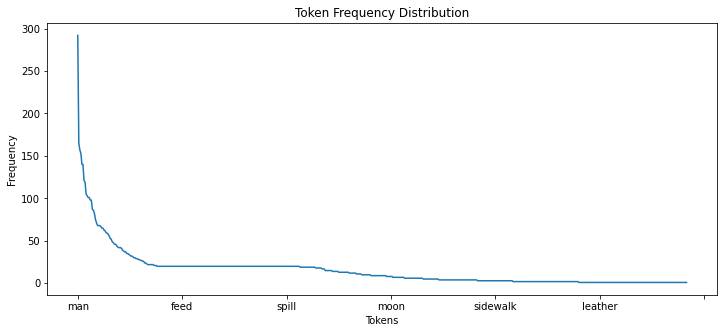

Top 10 frequent words and their frequencies:
man         292
air         165
dog         157
water       153
girl        140
elephant    140
hand        121
cat         119
house       105
child       103
dtype: int64


man       292
air       165
dog       157
water     153
girl      140
         ... 
school      1
worker      1
jaw         1
onions      1
jeans       1
Length: 584, dtype: int64

In [82]:
def total_words(dataset):
    
    # Combine text data into a single string
    all_text = ' '.join(dataset['text']).lower()

    tokens = word_tokenize(all_text)
    total_words_count = len(tokens)

    print(f"Total number of words in the dataset: {total_words_count}")

    return total_words_count

def total_unique_words(dataset):
    
    all_text = ' '.join(dataset['text']).lower()

    tokens = word_tokenize(all_text)
    unique_words = set(tokens)
    total_unique_words = len(unique_words)

    print(f"Total number of unique words in the dataset: {total_unique_words}")

    return total_unique_words

def token_frequency(dataset):
    
    all_text = ' '.join(dataset['text']).lower().split()
    token_frequency = pd.Series(all_text).value_counts()

    #Show the word frequency in line
    plt.figure(figsize=(12, 5))
    token_frequency.plot()
    plt.xlabel('Tokens')
    plt.ylabel('Frequency')
    plt.title('Token Frequency Distribution')
    plt.show()
    
    # Get the top 10 frequency words and their frequencies
    top_10_words = token_frequency.head(10)
    print("Top 10 frequent words and their frequencies:")
    print(top_10_words)

    return token_frequency

total_words(dataset)
total_unique_words(dataset)
token_frequency(dataset)

### Aspect 2: Text Length Analysis
   - The dataset consistently demonstrates texts composed of merely three words each.
   - In the S-V-O structure of the texts, no modifiers are present.

Text Length Statistics:
Mean of text length: 3.0
Median of text length: 3.0
Standard Deviation of text length: 0.0
Minimum of text length: 3.0
Maximum of text length: 3.0


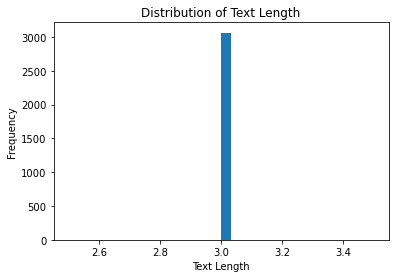

{'Mean of text length': 3.0,
 'Median of text length': 3.0,
 'Standard Deviation of text length': 0.0,
 'Minimum of text length': 3,
 'Maximum of text length': 3}

In [83]:
def text_length(dataset):
    
    dataset['text_length'] = dataset['text'].apply(lambda x: len(x.split()))
    
    #important statistics
    text_length_statistics = {
        'Mean of text length': dataset['text_length'].mean(),
        'Median of text length': dataset['text_length'].median(),
        'Standard Deviation of text length': dataset['text_length'].std(),
        'Minimum of text length': dataset['text_length'].min(),
        'Maximum of text length': dataset['text_length'].max()
    }

    print("Text Length Statistics:")
    for stat_name, stat_value in text_length_statistics.items():
        print(f"{stat_name}: {stat_value:.1f}")  
    
    #show it in histogram
    plt.hist(dataset['text_length'], bins=30)
    plt.xlabel('Text Length')
    plt.ylabel('Frequency')
    plt.title('Distribution of Text Length')
    plt.show()
    
    return text_length_statistics

text_length(dataset)

### Aspect 3: Part-of-Speech Tag Distribution Analysis
- Nouns constitute the highest percentage, accounting for 70.2%.
- Following that, verbs make up 16.2% of the words.
- Proper nouns (often names or specific entities) represent 11.5%.
- Adjectives, although a smaller portion at 2.1%, might contain some mislabeling or ambiguity in their tagging.
- Auxiliary verbs and interjections are minimal, making up 0.0%.

Top 10 frequent tags and their percentages:
  POS_Tag  Frequency  Percentage
0    NOUN       6447        70.2
1    VERB       1489        16.2
2   PROPN       1052        11.5
3     ADJ        193         2.1
4     AUX          3         0.0
5    INTJ          2         0.0


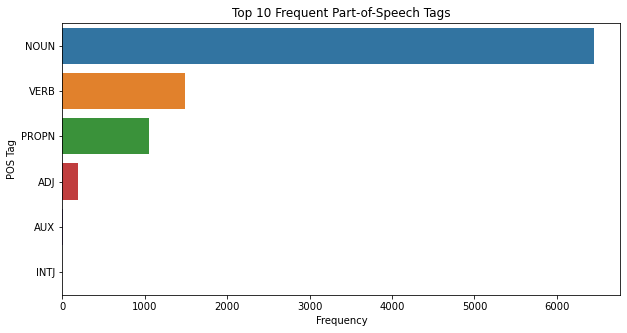

In [84]:
# Load the SpaCy model
# nlp = spacy.load('en_core_web_sm')
# nlp = spacy.load('en_core_web_md') 

nlp = spacy.load('en_core_web_lg') # with higher accuracy

def pos_tag_distribution(dataset):
    
    all_text = ' '.join(dataset['text']).lower()
    
    doc = nlp(all_text)
    pos_tags = [token.pos_ for token in doc]
    
    tag_freq = pd.Series(pos_tags).value_counts().reset_index()
    tag_freq.columns = ['POS_Tag', 'Frequency']
    
    total_tags = tag_freq['Frequency'].sum()
    tag_freq['Percentage'] = (tag_freq['Frequency'] / total_tags) * 100
    tag_freq['Percentage'] = tag_freq['Percentage'].round(1)
    
    top_10_tags = tag_freq.head(10)
    print("Top 10 frequent tags and their percentages:")
    print(top_10_tags)
    
    plt.figure(figsize=(10, 5))
    sns.barplot(x='Frequency', y='POS_Tag', data=top_10_tags)
    plt.title('Top 10 Frequent Part-of-Speech Tags')
    plt.xlabel('Frequency')
    plt.ylabel('POS Tag')
    plt.show()

pos_tag_distribution(dataset)

In [85]:
def show_adj_words(dataset):
    
    adj_words = []
    text_associated = []
    
    for text in dataset['text']:
        doc = nlp(text)
        for token in doc:
            if token.pos_ == 'ADJ':
                adj_words.append(token.text)
                text_associated.append(text)
    
    adj_text = pd.DataFrame({'Adj': adj_words, 'Text': text_associated})
    return adj_text

print(show_adj_words(dataset))

        Adj                Text
0      warm     fire warm vapor
1       wet       water wet oil
2      cool  spatula cool table
3     close  dentist close door
4      warm   stove warm rabbit
..      ...                 ...
177  remote     man feed remote
178    open  infant open closet
179  remote      man hit remote
180   close  water close bottle
181    warm       ice warm bush

[182 rows x 2 columns]


### Aspect 4: Subject, Verb, Object Similarity Analysis
- The words show low similarity within each category (Subject, Verb, Object).
- The verb exhibits relatively higher similarity compared to the subject and object.

Average similarity score of Subject: 0.14
Average similarity score of Verb: 0.17
Average similarity score of Object: 0.13


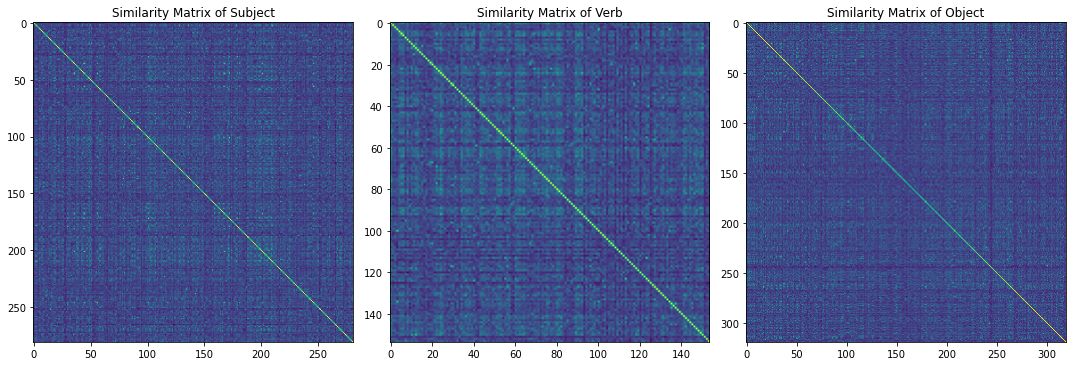

In [86]:
# Load the Word2Vec model
# word2vec_model = api.load('word2vec-google-news-300')

def word_similarity(dataset):
    
    sub = dataset['text'].apply(lambda x: x.split()[0])
    verb = dataset['text'].apply(lambda x: x.split()[1])
    obj = dataset['text'].apply(lambda x: x.split()[2])

    sub_set = list(set(sub))
    verb_set = list(set(verb))
    obj_set = list(set(obj))

    def get_word_vectors(word_set):
        
        word_vectors = []
        for word in word_set:
            try:
                word_vectors.append(word2vec_model[word])
            except KeyError:
                pass
            
        return np.array(word_vectors)

    # Get word vectors for each set
    sub_set_vectors = get_word_vectors(sub_set)
    verb_set_vectors = get_word_vectors(verb_set)
    obj_set_vectors = get_word_vectors(obj_set)

    # Calculate cosine similarity matrix within each set
    def calculate_similarity_matrix(word_vectors):
        
        similarity_matrix = np.dot(word_vectors, word_vectors.T)
        square_mag = np.diag(similarity_matrix)
        inv_square_mag = 1 / np.sqrt(square_mag)
        cosine_similarity = similarity_matrix * inv_square_mag
        cosine_similarity = cosine_similarity.T * inv_square_mag
        
        return cosine_similarity

    similarity_matrix_sub = calculate_similarity_matrix(sub_set_vectors) 
    similarity_matrix_verb = calculate_similarity_matrix(verb_set_vectors)
    similarity_matrix_obj = calculate_similarity_matrix(obj_set_vectors)

    # Calculate average similarity scores for each matrix
    avg_similarity_sub = np.mean(similarity_matrix_sub).round(2)
    print("Average similarity score of Subject:", avg_similarity_sub)
    avg_similarity_verb = np.mean(similarity_matrix_verb).round(2)
    print("Average similarity score of Verb:", avg_similarity_verb)
    avg_similarity_obj = np.mean(similarity_matrix_obj).round(2)
    print("Average similarity score of Object:", avg_similarity_obj)
    
    # Show it in picture
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    axs[0].imshow(similarity_matrix_sub)
    axs[0].set_title('Similarity Matrix of Subject')
    axs[1].imshow(similarity_matrix_verb)
    axs[1].set_title('Similarity Matrix of Verb')
    axs[2].imshow(similarity_matrix_obj)
    axs[2].set_title('Similarity Matrix of Object')
    plt.tight_layout()
    plt.show()

word_similarity(dataset)

### Aspect 5: Word Overlap Across Train, Dev, and Test Datasets Analysis
- A small percentage of new words is observed in the dev dataset (1.88%) and test dataset (1.71%).

Word Overlap Across Train, Dev, and Test Datasets:
Overlap words in three datasets: 233 (39.90%)
Overlap words in two datasets: 156 (26.71%)
Words only in Train: 174 (29.79%)
Words only in Dev: 11 (1.88%)
Words only in Test: 10 (1.71%)


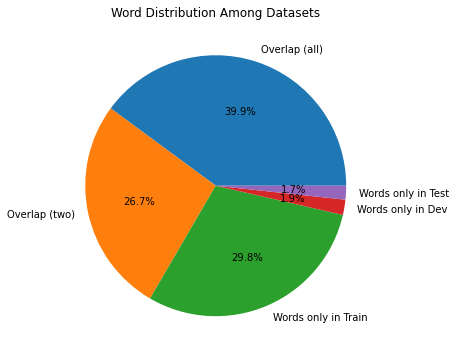

In [87]:
def word_overlap(train_data, dev_data, test_data):
    
    train_data = pd.read_csv(train_data)
    dev_data = pd.read_csv(dev_data)
    test_data = pd.read_csv(test_data)

    # Get sets of words from each dataset
    train_words = set([word.lower() for text in train_data['text'] for word in text.split()])
    dev_words = set([word.lower() for text in dev_data['text'] for word in text.split()])
    test_words = set([word.lower() for text in test_data['text'] for word in text.split()])

    # Calculate overlapping words
    overlap_in_three = train_words.intersection(dev_words, test_words)
    overlap_in_two = (train_words.intersection(dev_words) | train_words.intersection(test_words) | dev_words.intersection(test_words)) - overlap_in_three

    # Calculate unique words in each dataset
    train_unique = train_words - (overlap_in_three | overlap_in_two)
    dev_unique = dev_words - (overlap_in_three | overlap_in_two)
    test_unique = test_words - (overlap_in_three | overlap_in_two)

    # Calculate counts and percentages
    total_words = len(train_unique) + len(dev_unique) + len(test_unique) + len(overlap_in_three) + len(overlap_in_two)
    overlap_in_three_count = len(overlap_in_three)
    overlap_in_two_count = len(overlap_in_two)
    train_unique_count = len(train_unique)
    dev_unique_count = len(dev_unique)
    test_unique_count = len(test_unique)

    # Calculate percentages
    overlap_in_three_percentage = (overlap_in_three_count / total_words) * 100
    overlap_in_two_percentage = (overlap_in_two_count / total_words) * 100
    train_unique_percentage = (train_unique_count / total_words) * 100
    dev_unique_percentage = (dev_unique_count / total_words) * 100
    test_unique_percentage = (test_unique_count / total_words) * 100

    # Store statistics
    labels = ['Overlap (all)', 'Overlap (two)', 'Words only in Train', 'Words only in Dev', 'Words only in Test']
    sizes = [ overlap_in_three_count, overlap_in_two_count, train_unique_count, dev_unique_count, test_unique_count]
  
    # Display statistics
    print("Word Overlap Across Train, Dev, and Test Datasets:")
    print("Overlap words in three datasets:", overlap_in_three_count, f"({overlap_in_three_percentage:.2f}%)")
    print("Overlap words in two datasets:", overlap_in_two_count, f"({overlap_in_two_percentage:.2f}%)")
    print("Words only in Train:", train_unique_count, f"({train_unique_percentage:.2f}%)")
    print("Words only in Dev:", dev_unique_count, f"({dev_unique_percentage:.2f}%)")
    print("Words only in Test:", test_unique_count, f"({test_unique_percentage:.2f}%)")
    
    # Show in pie graph
    plt.figure(figsize=(8, 6))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%')
    plt.title('Word Distribution Among Datasets')
    plt.show()

train_data = 'train.csv'
dev_data = 'dev.csv'
test_data = 'test.csv'

word_overlap(train_data, dev_data, test_data)